In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'sklearn'

In [36]:
df=pd.read_csv("hepatitis.csv")

In [37]:
df

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
150,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
151,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [38]:
cols=["Class","Age","Sex","Steroid","Antivirals","Fatigue","Malaise","Anorexia","Liver Big","Liver Firm","Spleen","Spiders","Ascites","Varices","Bilirubin","Alk Phosphate","Sgot","Albumin","Protime","Histology"]

In [39]:
df.columns=cols

In [40]:
df

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
150,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
151,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [41]:
df.isna().sum()

Class            0
Age              0
Sex              0
Steroid          0
Antivirals       0
Fatigue          0
Malaise          0
Anorexia         0
Liver Big        0
Liver Firm       0
Spleen           0
Spiders          0
Ascites          0
Varices          0
Bilirubin        0
Alk Phosphate    0
Sgot             0
Albumin          0
Protime          0
Histology        0
dtype: int64

In [42]:
df.replace('?',np.nan,inplace=True)

In [43]:
df

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
2,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,50,2
150,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,NaN,2
151,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,NaN,2
152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [44]:
df.dropna(inplace=True)

In [45]:
df

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
9,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1
10,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,1
11,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,1
12,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.20,57,144,4.9,78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2,45,1,2,1,2,2,2,2,2,2,2,2,2,1.30,85,44,4.2,85,2
142,1,49,1,1,2,1,1,2,2,2,1,1,2,2,1.40,85,70,3.5,35,2
144,2,31,1,1,2,1,2,2,2,2,2,2,2,2,1.20,75,173,4.2,54,2
152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [46]:
df.apply(pd.to_numeric,errors='ignore')

C:\Users\Pranavd\AppData\Local\Temp\ipykernel_3352\3364649881.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df.apply(pd.to_numeric,errors='ignore')


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
9,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.3,78,30,4.4,85,1
10,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.0,59,249,3.7,54,1
11,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.9,81,60,3.9,52,1
12,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2,45,1,2,1,2,2,2,2,2,2,2,2,2,1.3,85,44,4.2,85,2
142,1,49,1,1,2,1,1,2,2,2,1,1,2,2,1.4,85,70,3.5,35,2
144,2,31,1,1,2,1,2,2,2,2,2,2,2,2,1.2,75,173,4.2,54,2
152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [47]:
df

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
9,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1
10,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,1
11,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,1
12,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.20,57,144,4.9,78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2,45,1,2,1,2,2,2,2,2,2,2,2,2,1.30,85,44,4.2,85,2
142,1,49,1,1,2,1,1,2,2,2,1,1,2,2,1.40,85,70,3.5,35,2
144,2,31,1,1,2,1,2,2,2,2,2,2,2,2,1.20,75,173,4.2,54,2
152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [48]:
numerical_df=df.select_dtypes(include=np.number)
z_scores = np.abs((numerical_df-numerical_df.mean())/numerical_df.std())
outliers = z_scores >3
numerical_df=numerical_df[~outliers.any(axis=1)]
z_scores

,Class,Age,Sex,Antivirals,Histology
4,0.437726,0.590646,0.396771,0.592860,0.832677
9,0.437726,0.147384,0.396771,1.665654,0.832677
10,0.437726,0.767950,0.396771,1.665654,0.832677
11,0.437726,0.029920,0.396771,1.665654,0.832677
12,0.437726,0.945255,0.396771,0.592860,0.832677
...,...,...,...,...,...
138,0.437726,0.384529,0.396771,1.665654,1.185934
142,2.255975,0.739138,0.396771,0.592860,1.185934
144,0.437726,0.856602,0.396771,0.592860,1.185934
152,0.437726,1.093747,2.488839,0.592860,1.185934


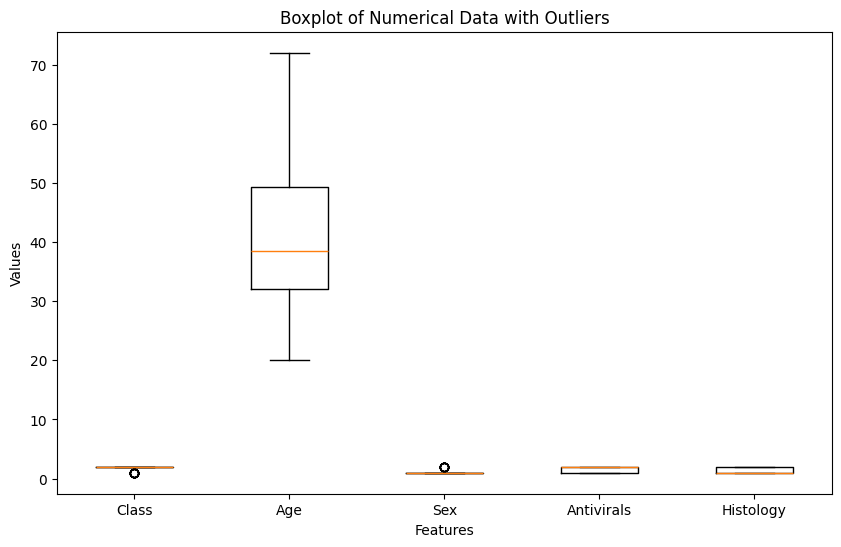

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(numerical_df.values, labels=numerical_df.columns)
plt.title('Boxplot of Numerical Data with Outliers')
plt.ylabel('Values')
plt.xlabel('Features')
plt.show()

In [50]:
numerical_cols = df.select_dtypes(include=np.number).columns

In [51]:
scaler=StandardScaler()
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])
df

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
4,0.440488,-0.594372,-0.399275,2,0.596601,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,-0.837931
9,0.440488,-0.148314,-0.399275,1,-1.676163,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,-0.837931
10,0.440488,-0.772795,-0.399275,2,-1.676163,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,-0.837931
11,0.440488,0.030109,-0.399275,2,-1.676163,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,-0.837931
12,0.440488,-0.951218,-0.399275,2,0.596601,1,2,2,2,1,2,2,2,2,2.20,57,144,4.9,78,-0.837931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.440488,0.386955,-0.399275,2,-1.676163,2,2,2,2,2,2,2,2,2,1.30,85,44,4.2,85,1.193416
142,-2.270208,0.743801,-0.399275,1,0.596601,1,1,2,2,2,1,1,2,2,1.40,85,70,3.5,35,1.193416
144,0.440488,-0.862007,-0.399275,1,0.596601,1,2,2,2,2,2,2,2,2,1.20,75,173,4.2,54,1.193416
152,0.440488,1.100648,2.504541,1,0.596601,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,1.193416


In [52]:
df['Class']=np.where(df['Class']>=df['Class'].median(),1,0)

In [53]:
X=df.drop('Class',axis=1)
y=df['Class']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
model1=LogisticRegression()
model1.fit(X_train,y_train)
model1.predict(X_test)
print(accuracy_score(y_test,model1.predict(X_test)))

0.9375


c:\Users\Pranavd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
model2=GaussianNB()
model2.fit(X_train,y_train)
model2.predict(X_test)
print(accuracy_score(y_test,model2.predict(X_test)))

0.8125
